In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

%matplotlib inline

#from sklearn.preprocessing import MinMaxScaler

2023-07-27 10:21:46.040502: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Set the data path for the training and test CSV files
train_file = "training.csv"
test_file = "test.csv"

In [3]:
# Create Pandas DataFrames (df) from csv files
df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

In [5]:
# Display for a quick check of the data
display(df_train)
display(df_test)

,Id,__experiment__,__run__,__event__,__production__,__candidate__,__ncandidates__,__weight__,Ecms,B_Mbc,...,g2_clusterNHits,g2_clusterTiming,g2_clusterE9E21,g2_clusterE,g2_clusterReg,g2_genMotherPDG,g2_mcPDG,g2_isSignal,g2_beamBackgroundSuppression,g2_fakePhotonSuppression
0,20099,1003,0,1198846,25052,0,1,1,10.579557,5.278909,...,12.109375,0.000000,0.946289,2.175088,2,111,22.0,1.0,0.998713,0.898369
1,66782,1003,0,18283271,24796,0,1,1,10.579557,5.261308,...,10.351562,0.000000,0.992188,0.959843,2,111,22.0,1.0,0.997489,0.993644
2,44957,1003,0,9119693,24786,0,1,1,10.579557,5.283415,...,11.914062,1.464844,0.958984,0.731571,2,111,22.0,1.0,0.997489,0.967065
3,24367,1003,0,1457085,25052,0,1,1,10.579557,5.282160,...,14.453125,0.000000,0.990234,2.266155,2,111,22.0,1.0,0.999542,0.999896
4,1781,1003,0,1910864,25052,0,1,1,10.579557,5.287058,...,13.867188,0.488281,0.988281,2.103155,2,111,22.0,1.0,0.999036,0.998380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68618,49229,1003,0,25367418,24786,0,1,1,10.579557,5.278328,...,12.695312,0.000000,0.977539,1.005171,2,111,22.0,1.0,0.997489,0.976373
68619,52704,1003,0,209581273,24786,0,1,1,10.579557,5.278947,...,10.937500,-0.488281,0.996094,1.012189,2,111,22.0,1.0,0.998713,0.969941
68620,25028,1003,0,380122,25052,0,1,1,10.579557,5.280292,...,12.109375,-0.976562,0.968750,0.712034,2,111,22.0,1.0,0.998406,0.992211
68621,31935,1003,0,4720,25052,0,1,1,10.579557,5.279301,...,16.796875,0.488281,0.972656,2.452093,2,111,22.0,1.0,0.999577,0.995089


,Id,__experiment__,__run__,__event__,__production__,__candidate__,__ncandidates__,__weight__,Ecms,B_Mbc,...,g2_clusterNHits,g2_clusterTiming,g2_clusterE9E21,g2_clusterE,g2_clusterReg,g2_genMotherPDG,g2_mcPDG,g2_isSignal,g2_beamBackgroundSuppression,g2_fakePhotonSuppression
0,11246,1003,0,405767,25052,0,1,1,10.579557,5.284543,...,16.406250,-0.488281,0.976562,1.942076,2,111,22.0,1.0,0.999520,0.999903
1,43945,1003,0,2557355,24786,0,1,1,10.579557,5.263069,...,16.992188,0.000000,0.984375,2.255805,2,111,22.0,1.0,0.999837,0.999998
2,41103,1003,0,409166,25052,0,1,1,10.579557,5.277756,...,13.671875,0.000000,0.987305,2.125415,2,111,22.0,1.0,0.999036,0.938329
3,13420,1003,0,601785,25052,0,1,1,10.579557,5.279766,...,11.328125,-1.464844,0.984375,1.351285,2,111,22.0,1.0,0.998653,0.829727
4,16675,1003,0,1205421,25052,0,1,1,10.579557,5.285635,...,11.328125,1.464844,0.987305,0.866036,2,111,22.0,1.0,0.997489,0.989053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17150,17921,1003,0,1169352,25052,0,1,1,10.579557,5.275215,...,9.960938,0.488281,0.978516,1.445167,2,111,22.0,1.0,0.998713,0.919587
17151,5586,1003,0,629101,25052,0,1,1,10.579557,5.281576,...,5.273438,1.953125,0.997070,0.103917,2,111,22.0,1.0,0.998477,0.960903
17152,26935,1003,0,1195172,25052,0,1,1,10.579557,5.282966,...,17.968750,-0.976562,0.965820,2.747891,2,111,22.0,1.0,0.999524,0.996227
17153,14047,1003,0,1202145,25052,0,1,1,10.579557,5.281320,...,12.109375,-0.976562,0.985352,0.716065,2,111,22.0,1.0,0.997708,0.997422


In [4]:

# Shuffle training set
df_train_shuffled = df_train.sample(frac=1)

In [13]:
# Display(df_train_shuffled)
for col in df_train_shuffled.columns:
    print(col)

Id
__experiment__
__run__
__event__
__production__
__candidate__
__ncandidates__
__weight__
Ecms
B_Mbc
B_deltaE
B_isContinuumEvent
B_R2
B_thrustBm
B_thrustOm
B_cosTBTO
B_cosTBz
B_KSFWV_et
B_KSFWV_mm2
B_KSFWV_hso00
B_KSFWV_hso01
B_KSFWV_hso02
B_KSFWV_hso03
B_KSFWV_hso04
B_KSFWV_hso10
B_KSFWV_hso12
B_KSFWV_hso14
B_KSFWV_hso20
B_KSFWV_hso22
B_KSFWV_hso24
B_KSFWV_hoo0
B_KSFWV_hoo1
B_KSFWV_hoo2
B_KSFWV_hoo3
B_KSFWV_hoo4
B_CC1
B_CC2
B_CC3
B_CC4
B_CC5
B_CC6
B_CC7
B_CC8
B_CC9
B_foxWolframR1
B_foxWolframR4
B_thrustAxisCosTheta
B_DeltaZ
B_DeltaZErr
B_TagVReChi2
B_TagVReChi2IP
B_TagVx
B_TagVxErr
B_TagVy
B_TagVyErr
B_TagVz
B_TagVzErr
B_TagVNTracks
B_daughterAngle
B_daughterAngle_CMS
B_daughterDiff_phi
B_daughterDiff_CMS_phi
B_daughterDiff_theta
B_daughterDiff_CMS_theta
B_daughterDiff_p
B_daughterDiff_CMS_p
B_p
B_pErr
B_phi
B_phiErr
B_theta
B_thetaErr
B_roeP
B_roePTheta
B_roeCharge
B_mcErrors
B_mcPDG
B_isSignal
B_CMS_cosTheta
K_p
K_pErr
K_phi
K_phiErr
K_theta
K_thetaErr
K_nCDCHits
K_pValue
K_charge

In [5]:
# Plotting 
def plotLog(var, nbins, myrange, label):
    
    ax = plt.subplot()
    
    # Define a numpy array from the var column in the dataframe
    npbkg = df_train_shuffled.query('B_isContinuumEvent==1')[var].to_numpy()
    nptrue = df_train_shuffled.query('B_isContinuumEvent==0')[var].to_numpy()
    
    # Create a matplotlib histogram
    ax.hist([npbkg,nptrue], bins=nbins, range=myrange,label=["bkg","signal"],histtype='step', stacked=False)
    # Set plot features
    plt.yscale("log")
    plt.xlim(myrange)
    plt.xlabel(label)
    #epb = ((max(myrange) - min(myrange))*1000)/ nbins  #events per bins
    #plt.ylabel(r'Events / (%.3f MeV/$c^2$)' % epb)
    
    plt.legend()
    plt.show()
    plt.show()

In [6]:
# Define features (training variables) and target
features = ['B_R2', 'B_p', 'B_thrustAxisCosTheta', 'B_CC9', 'B_CC8', 'B_CC7', 'B_CC6', 'B_CC4',
            'B_CC3', 'B_CC2', 'B_CC1', 'B_KSFWV_hso14', 'B_KSFWV_hso12']
target = ['B_isContinuumEvent']

In [7]:
# Create dataframes for training and target based on entries from shuffled training sample 
training = df_train_shuffled[features]
target = df_train_shuffled[target]

In [8]:
# Scale training features, if needed
#min_max_scaler = MinMaxScaler()
#training[features] = min_max_scaler.fit_transform(training[features])

In [9]:
# Convert to numpy
training = training.to_numpy()
target = target.to_numpy()

In [10]:
# Rename
X_train = training
y_train = target

In [12]:
# Define neural network model
def buildmodel(n_hidden = 2, n_neurons = 64, learning_rate = 0.01, input_shape = [13]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))

    model.add(keras.layers.Dense(1,activation='sigmoid'))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss= 'binary_crossentropy')

    return model

In [13]:
# Plot model
def plotModel():
    modeltoplot = buildmodel()
    modeltoplot.summary()
    keras.utils.plot_model(modeltoplot, 'continuum_model.png', show_shapes=True)

plotModel()

In [15]:
# Create the model instance that will be used for training.
model = buildmodel()

In [ ]:
# Plot a graphical representation of the model
keras.utils.plot_model(model, "continuum_model_display.png", show_shapes=True)

In [ ]:
# Train and save model using callbacks to reduce overfitting
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
my_callbacks = [keras.callbacks.EarlyStopping(patience=10), reduce_lr]
training_history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[my_callbacks], verbose=2)
model.save("continuum_model")

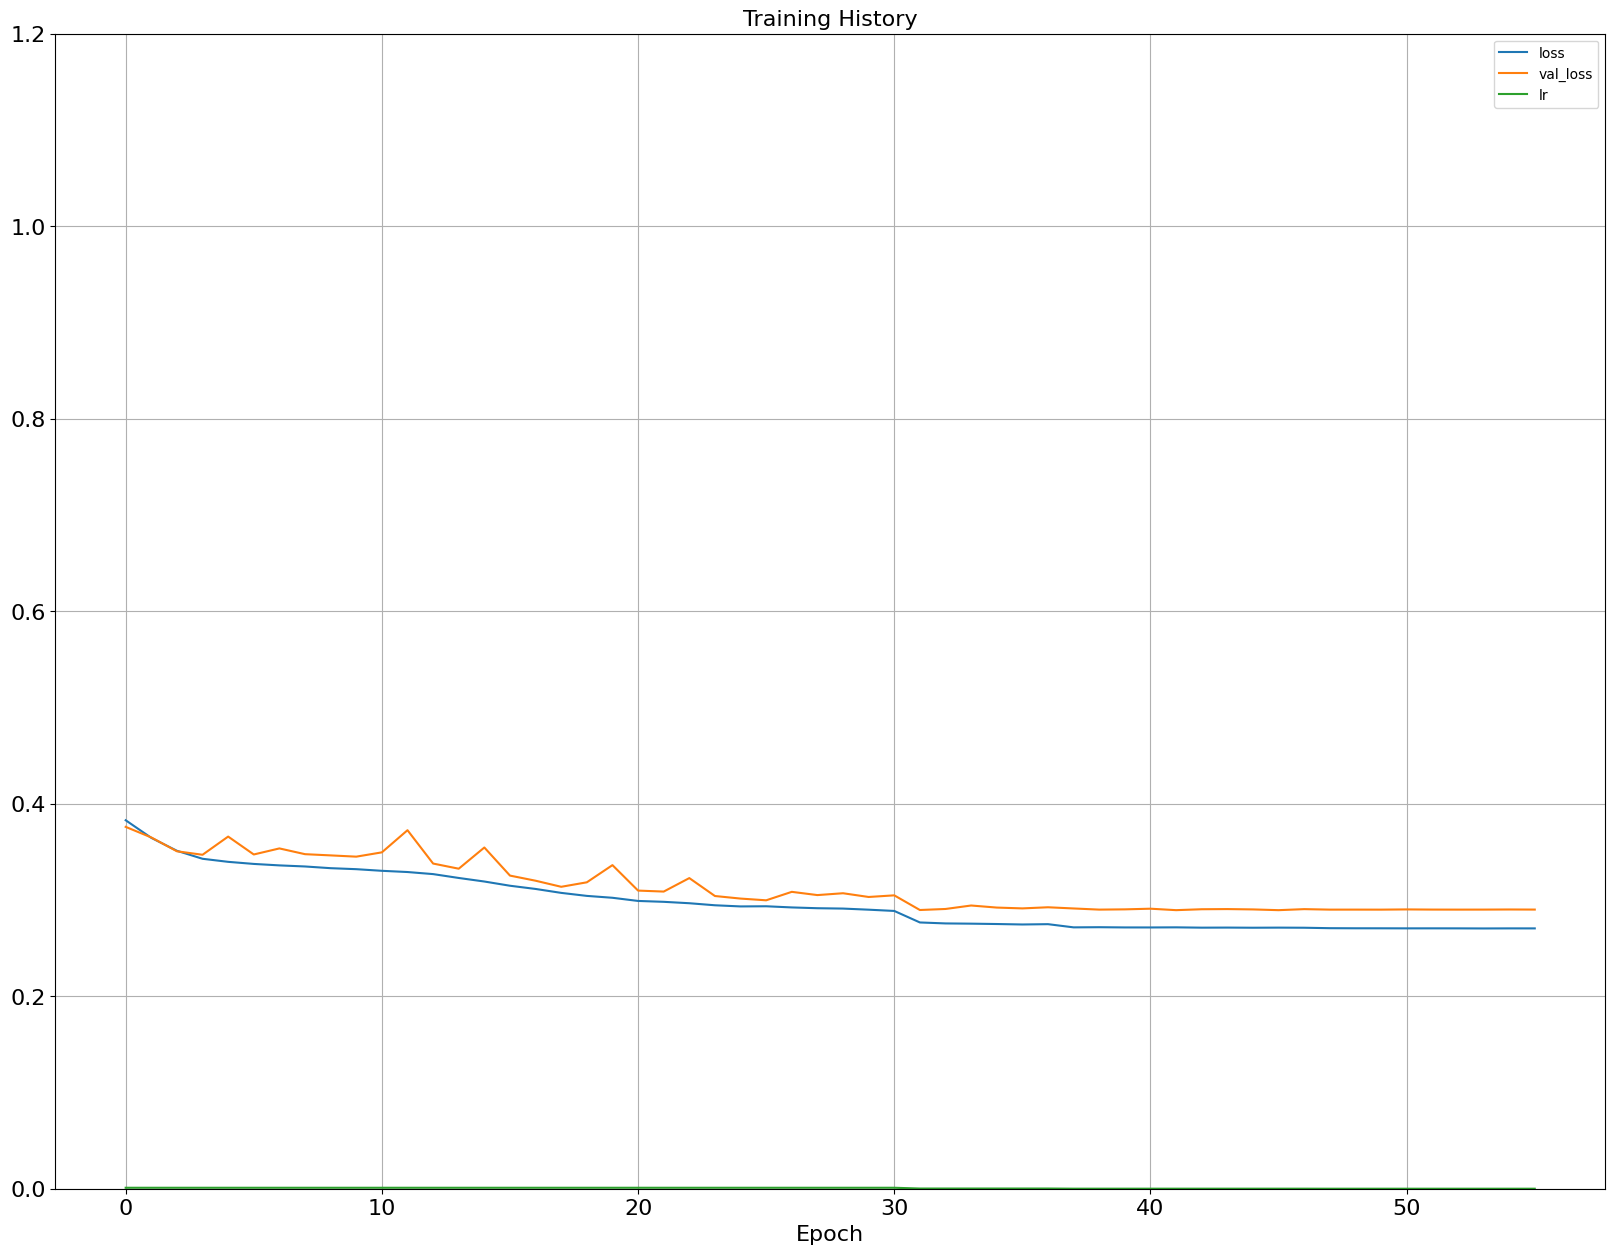

In [18]:
# Plot training history
pd.DataFrame(training_history.history).plot(figsize=(20, 15))
plt.grid(True)
plt.ylim(top=1.2)
plt.ylim(bottom=0)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Training History", fontsize=16)
plt.xlabel('Epoch', fontsize=16)
fname = "continuum_model_traininghistory.png"
plt.savefig(fname, dpi=None, facecolor='w', edgecolor='w', orientation='portrait', transparent=False, bbox_inches=None, pad_inches=0.1)
plt.show()

In [19]:
# save training history
df_training_hist = pd.DataFrame(training_history.history)

filename_csv = "continuum_model_traininghistory.csv"
df_training_hist.to_csv(filename_csv)

In [20]:
# Prepare the test data for evaluation
test = df_test[features]
test = test.to_numpy()

X_test = test

In [21]:
# Evaluate the model on the test data
y_predict_test = model.predict(X_test)

537/537 [==============================] - 1s 826us/step


In [22]:
# Append the results of the evaluation to the dataframe with the test data
df_test['B_isContinuumEvent'] = y_predict_test

In [23]:
display(df_test[['Id', 'B_isContinuumEvent']])

,Id,B_isContinuumEvent
0,11246,0.669668
1,43945,0.984520
2,41103,0.098608
3,13420,0.563187
4,16675,0.096779
...,...,...
17150,17921,0.007330
17151,5586,0.003336
17152,26935,0.672697
17153,14047,0.060825


In [24]:
vars_for_evaluation = ['Id', 'B_isContinuumEvent']

In [25]:
# Select only the columns you need for the competition
df_for_evaluation = df_test[vars_for_evaluation]

In [26]:
display(df_for_evaluation)

,Id,B_isContinuumEvent
0,11246,0.669668
1,43945,0.984520
2,41103,0.098608
3,13420,0.563187
4,16675,0.096779
...,...,...
17150,17921,0.007330
17151,5586,0.003336
17152,26935,0.672697
17153,14047,0.060825


In [ ]:
# Save to CSV
final_csv = 'final.csv'
df_for_evaluation.to_csv(final_csv, index=False)